<a href="https://colab.research.google.com/github/Viraj1901181/CF969-Big-Data-for-Computational-Finance/blob/master/Vanilla_Black_Scholes_Model_for_Option_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Black-Scholes
import math

In [0]:
# Return the value of the Gaussian probability function with mean 0.0
# and standard deviation 1.0 at the given x value.

def phi(x):
    return math.exp(-x * x / 2.0) / math.sqrt(2.0 * math.pi)


In [0]:
# Return the value of the Gaussian probability function with mean mu
# and standard deviation sigma at the given x value.

def pdf(x, mu=0.0, sigma=1.0):
    return phi((x - mu) / sigma) / sigma

In [0]:
# Return the value of the cumulative Gaussian distribution function
# with mean 0.0 and standard deviation 1.0 at the given z value.

def Phi(z):
    if z < -8.0: return 0.0
    if z >  8.0: return 1.0
    total = 0.0
    term = z
    i = 3
    while total != total + term:
        total += term
        term *= z * z / float(i)
        i += 2
    return 0.5 + total * phi(z)

In [0]:
# Return standard Gaussian cdf with mean mu and stddev sigma.
# Use Taylor approximation.

def cdf(z, mu=0.0, sigma=1.0):
    return Phi((z - mu) / sigma)


In [0]:
# Black-Scholes formula.

def callPrice(s, x, r, sigma, t):
    a = (math.log(s/x) + (r + sigma * sigma/2.0) * t) / \
        (sigma * math.sqrt(t))
    b = a - sigma * math.sqrt(t)
    return s * cdf(a) - x * math.exp(-r * t) * cdf(b)

In [0]:
# Accept s, x, r, sigma, and t from the command line and write
# the Black-Scholes value.

S0 = 100.          # initial index level
K = 105.           # strike price
T = 1.0            # time-to-maturity
r = 0.05           # riskless short rate
sigma = 0.2        # volatility

C0_BlackScholes = callPrice(S0, K, r, sigma, T)

In [8]:
print ("Value of the European Call Option {:,.4}".format(C0_BlackScholes))

Value of the European Call Option 8.021


# Python Implementation of MonteCarlo for non-dividend paying options

Monte Carlo simulation is used for option pricing and risk management problems. However, the Monte Carlo method is computationally demanding.

A European style option can only be exercised on the expiration date. In contrast, an American style option can be exercised at any time before the expiration date.

A call option is the right to buy a specific financial instrument (specific amounts of currency, stocks, commodities, et cetera) at a specific price. The practical use of options is that they provide a type of insurance. If BMW needs a certain amount of Euros on a certain date and is expecting to have US Dollars on hand from car sales, they buy an option to make certain that even if the currency markets go against them, they know what to budget for the transaction. The premium is the amount they pay for an option. The more volatile the underlying security is, the higher the premium. The premium will indicate a certain volatility. This is called implied volatility.

The analogy of car insurance may help make this clear. For example, the higher the likelihood a person will get into an accident, the higher the premium for car insurance.

The model for calculating option prices is the Black-Scholes-Merton model, which is usually referred to as Black-Scholes.

In [0]:
# import modules

import numpy as np


In [0]:
# Inputs

S0 = 100.          # initial index level
K = 105.           # strike price
T = 1.0            # time-to-maturity
r = 0.05           # riskless short rate
sigma = 0.2        # volatility
simulations = 10000         # number of iterations/simulations


In [0]:
# Black-Scholes-Merton (1973) index level at maturity

z = np.random.standard_normal(simulations)

ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * z)

In [0]:
# Monte Carlo estimator for European option

hT = np.maximum(ST - K, 0)            # inner values at maturity
C0_monteCarlo = np.exp(-r * T) * sum(hT) / simulations     # Monte Carlo estimator

In [14]:
# Result
print ("Value of the European Call Option {:,.4}".format(C0_monteCarlo))

Value of the European Call Option 7.878


In [15]:
# Result
print ("Value of the European Call Option {:,.4}".format(C0_monteCarlo))

Value of the European Call Option 7.878


In [16]:
# Result
print("Results:")
print("-"*100)
print ("Value of the European Call Option by Black-Scholes: {:,.4}".format(C0_BlackScholes))
print ("Value of the European Call Option by MonteCarlo with {:,} simulations: {:,.4}".format(simulations, C0_monteCarlo))

Results:
----------------------------------------------------------------------------------------------------
Value of the European Call Option by Black-Scholes: 8.021
Value of the European Call Option by MonteCarlo with 10,000 simulations: 7.878


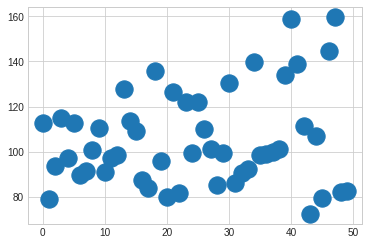

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

plt.scatter(range(50), ST[:50], s=300)
plt.show()